Krzysztof Swędzioł 418001 MOWNiT lab3

Poniżej podaję jeszcze dodatkowy kod w Julii do tworzenia DataFrame do analizy
ponieważ mój kod z wcześniejszych laboratoriów nie był w pełni poprawny.
Aby wzystko działało prawidłowo należy najpierw włączyć program julii i zaczekać aż wygeneruje on DataFrame.
Będzi on użyty do analizy w języku R.

In [8]:
import Pkg
using LinearAlgebra
using DataFrames
using CSV
using Statistics
using Plots

function calculate_prod(vec_size)                             #funkcja do generowania losowych wektorów i tworzenia iloczynu skalarnego 
    v1 = rand(1:10, vec_size)
    v2 = rand(1:10, vec_size)
    result = dot(v1, v2)
    return result
end

function multiply_matrix(matrix_size)                           #Funkcja do tworzenia losowej macierzy i mnożenia jej przez wektor 
    matrix = rand(1:10, matrix_size, matrix_size)
    vector = rand(1:10, matrix_size)
    result = matrix * vector
    return result
end

function measure_times()
    resultsFrame = DataFrame(n = Int[], alg = String[], time = Float64[], currSize = Int[])
    sizes = [10, 100, 150, 300, 600]
    repetitions = 10
    
    for size in sizes
        for func in [calculate_prod, multiply_matrix]
            times = Float64[]
            for rep in 1:repetitions
                time_taken = @elapsed func(size)
                push!(times, time_taken)
            end
            alg_name = func == calculate_prod ? "t1" : "t2"
            for rep in 1:repetitions
                push!(resultsFrame, (n = rep, alg = alg_name, time = times[rep], currSize = size))
            end
        end
    end
    csv_filename = "DataFrame_do_lab3.csv"
    CSV.write(csv_filename, resultsFrame)
    return resultsFrame
end

df = measure_times()

Row,n,alg,time,currSize
,Int64,String,Float64,Int64
1,1,t1,0.00526316,10
2,2,t1,3.297e-6,10
3,3,t1,9.91e-7,10
4,4,t1,4.52e-7,10
5,5,t1,3.95e-7,10
6,6,t1,2.91e-7,10
7,7,t1,3.18e-7,10
8,8,t1,2.01e-7,10
9,9,t1,2.99e-7,10


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
`summarise()` has grouped output by 'alg'. You can override using the `.groups`
argument.


alg,currSize,avg_time,sd_time
<chr>,<int>,<dbl>,<dbl>
t1,10,0.0005269636,1.664129e-03
t1,100,0.0000015218,5.507994e-07
t1,150,0.0000027906,7.313077e-07
t1,300,0.0000080997,4.433203e-06
t1,600,0.0000069324,1.014189e-06
t2,10,0.0005130461,1.617724e-03
t2,100,0.0000502811,1.305630e-05
t2,150,0.0001196507,1.441237e-05
t2,300,0.0005241089,1.376500e-04


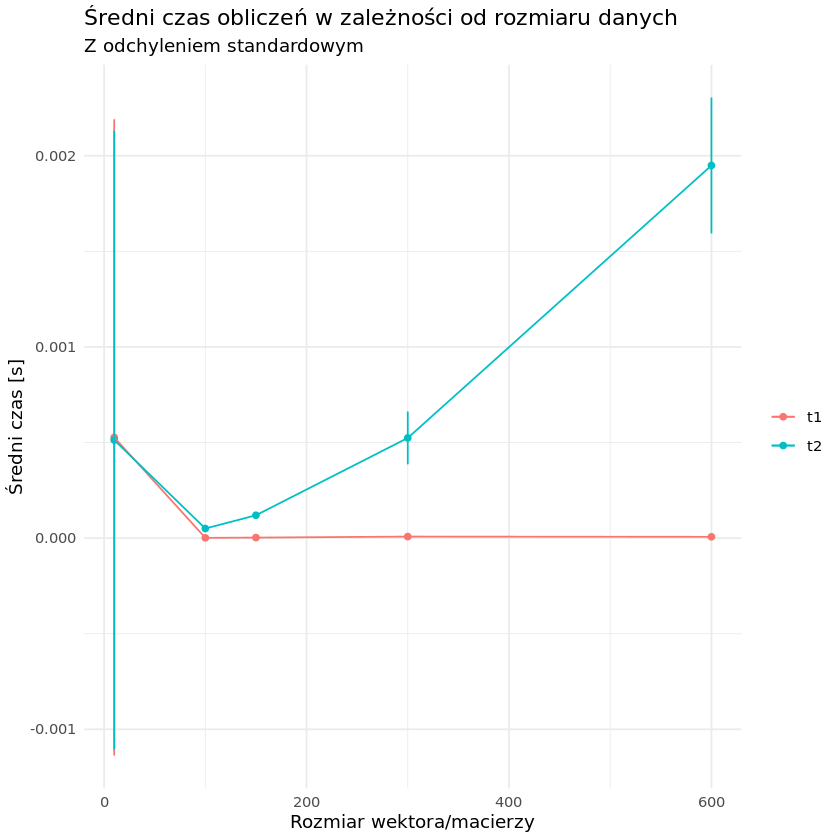

In [1]:
library("tidyverse")

results = read.csv("DataFrame_do_lab3.csv")

# Oblicza średnią i odchylenie standardowe
agg_data <- results %>%
  group_by(alg, currSize) %>%
  summarise(
    avg_time = mean(time),
    sd_time = sd(time)
  ) %>%
  ungroup()
agg_data

# Rysuje wykres ze średnią i słupkami błędów
ggplot(agg_data, aes(x = currSize, y = avg_time, group = alg, color = alg)) +
  geom_point() +
  geom_line() +
  geom_errorbar(aes(ymin = avg_time - sd_time, ymax = avg_time + sd_time), width = 0.2) +
  theme_minimal() +
  labs(x = "Rozmiar wektora/macierzy", y = "Średni czas [s]", title = "Średni czas obliczeń w zależności od rozmiaru danych", subtitle = "Z odchyleniem standardowym") +
  theme(legend.title = element_blank())